# WRANGLE AND ANALYZE 

# Gathering data for wrangling and analyzing the weratedogs
* using Twitter archive
* using programmatically
* using Twitter API

# Twitter Archive dataset
twitter-archive-enhanced.csv is provided by udacity and it is downloaded manually.

In [422]:
import pandas as pd
import numpy as np
df=pd.read_csv("F:/Data Analysis process/twitter-archive-enhanced.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# Image prediction dataset
Gathering using programmatically from udacity server

In [424]:
import requests as rq
import os
folder='image_predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'  
response=rq.get(url)
with open(os.path.join(folder,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)
os.listdir(folder)


['.ipynb_checkpoints', 'image-predictions.tsv']

In [425]:
image=pd.read_table('image_predictions/image-predictions.tsv',sep='\t')
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Twitter Dataset
Gathering using TWITTER API

In [426]:
import tweepy
from tweepy import OAuthHandler
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''




auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)





In [427]:
tweet_data = {}
error_list = []
df_list =[]
for tweet_id in df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id,tweet_mode='extended',
                                      wait_on_rate_limit=True,
                                      wait_on_rate_limit_notify=True)._json
        favorites = tweet['favorite_count'] 
        retweets = tweet['retweet_count'] 
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] 
        date_time = tweet['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
        
    except:
        print("Error for: " + str(tweet_id))
        error_list.append(tweet_id)


Error for: 888202515573088257
Error for: 873697596434513921
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 806620845233815552
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968


Rate limit reached. Sleeping for: 72


Error for: 754011816964026368


Rate limit reached. Sleeping for: 225


In [428]:
print("The lengh of the errors", len(error_list))

The lengh of the errors 15


In [429]:
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [430]:
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [431]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 6 columns):
tweet_id           2341 non-null int64
favorites          2341 non-null int64
retweets           2341 non-null int64
user_followers     2341 non-null int64
user_favourites    2341 non-null int64
date_time          2341 non-null object
dtypes: int64(5), object(1)
memory usage: 109.8+ KB


In [432]:
tweet_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38493,8477,7176129,137111,2017-08-01 16:23:56
1,892177421306343426,32981,6238,7175522,137110,2017-08-01 00:17:27
2,891815181378084864,24837,4136,7176129,137111,2017-07-31 00:18:03
3,891689557279858688,41858,8596,7176129,137111,2017-07-30 15:58:51
4,891327558926688256,40022,9333,7176129,137111,2017-07-29 16:00:24


# ACCESSING THE DATASET

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [434]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [328]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
tweet_id           2342 non-null int64
favorites          2342 non-null int64
retweets           2342 non-null int64
user_followers     2342 non-null int64
user_favourites    2342 non-null int64
date_time          2342 non-null object
dtypes: int64(5), object(1)
memory usage: 109.9+ KB


In [435]:
df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1762,678643457146150913,NaN,NaN,2015-12-20 18:29:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizz. He just arrived. Couldn't wait unt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678643457...,10,10,Grizz,None,None,None,None
643,793195938047070209,NaN,NaN,2016-10-31 21:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793195938...,12,10,Lily,None,None,None,puppo
360,829861396166877184,NaN,NaN,2017-02-10 01:15:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She already knows she's a good do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829861396...,12,10,Mia,None,None,None,None
1103,735256018284875776,NaN,NaN,2016-05-24 23:47:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kellogg. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735256018...,8,10,Kellogg,doggo,None,None,None
2003,672475084225949696,NaN,NaN,2015-12-03 17:58:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's photogenic af. Loves to se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672475084...,8,10,Buddy,None,None,None,None
2321,666435652385423360,NaN,NaN,2015-11-17 02:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Can you behave? You're ruining my wedding day...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666435652...,10,10,None,None,None,None,None
989,748932637671223296,NaN,NaN,2016-07-01 17:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Divine Doggo. Must be magical af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748932637...,13,10,Divine,doggo,None,None,None
177,857393404942143489,NaN,NaN,2017-04-27 00:38:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Instead of the usual nightly dog rate, I'm sha...",NaN,NaN,NaN,https://www.gofundme.com/meeko-needs-heart-sur...,13,10,None,None,None,None,None
2183,668989615043424256,NaN,NaN,2015-11-24 03:08:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He's taking his Halloween cost...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668989615...,3,10,Bernie,None,None,None,None
829,768909767477751808,NaN,NaN,2016-08-25 20:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When it's Janet from accounting...,7.001438e+17,4.196984e+09,2016-02-18 02:24:13 +0000,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None


In [436]:
image.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1799,831670449226514432,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,1,Pembroke,0.624802,True,Cardigan,0.362861,True,Appenzeller,0.003926,True
1797,831552930092285952,https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,1,Chihuahua,0.257415,True,Pembroke,0.161442,True,French_bulldog,0.092143,True
1464,778408200802557953,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,3,Pembroke,0.848362,True,Cardigan,0.108124,True,beagle,0.011942,True
730,686618349602762752,https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg,1,Rottweiler,0.441331,True,miniature_pinscher,0.233180,True,Gordon_setter,0.093582,True
597,679530280114372609,https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg,1,dalmatian,0.750256,True,jaguar,0.169007,False,zebra,0.006481,False
619,680440374763077632,https://pbs.twimg.com/ext_tw_video_thumb/68044...,1,space_heater,0.920367,False,radiator,0.049933,False,electric_fan,0.006719,False
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
247,670668383499735048,https://pbs.twimg.com/media/CU6xVkbWsAAeHeU.jpg,1,banana,0.107317,False,orange,0.099662,False,bagel,0.089033,False
1604,800388270626521089,https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg,2,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
964,706166467411222528,https://pbs.twimg.com/media/CczOp_OWoAAo5zR.jpg,1,Samoyed,0.430418,True,kuvasz,0.279600,True,Great_Pyrenees,0.117480,True


In [438]:
tweet_data.sample(20)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
764,776201521193218049,10347,2795,7176162,137112,2016-09-14 23:30:38
2313,666396247373291520,168,84,7176214,137113,2015-11-16 23:23:41
1413,697616773278015490,3351,1096,7176184,137112,2016-02-11 03:02:54
1285,707693576495472641,3633,1080,7176180,137112,2016-03-09 22:24:31
1519,689993469801164801,1562,500,7176185,137112,2016-01-21 02:10:37
164,859196978902773760,91678,31336,7176140,137111,2017-05-02 00:04:57
2211,668274247790391296,848,238,7176208,137113,2015-11-22 03:46:11
1130,727175381690781696,4095,1481,7176174,137112,2016-05-02 16:38:15
1062,739544079319588864,42158,23263,7176172,137112,2016-06-05 19:47:03
354,829449946868879360,11174,2229,7176145,137111,2017-02-08 22:00:52


In [439]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [440]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

# QUALITY ISSUES

# Twitter Archive table
* Timestamp data type should be converted to datatime.
* Removing the retweets from the dataset.
* Removing the incorrected words of name such as a,an,the,etc..
* Rating denominator and rating numerator have incorrect words.
* To replace the incorrect dog stage.

# Image table
* Tweet_id data type should be converted to string.
* p1,p2,p3 column is not consistent.
* Remove _ in p1 p2 p3 columns in between the columns to make consistent.

# Tweet data
* Tweet_id datatype conversion from int to string.

# TIDINESS ISSUE

* Combine dog stage into single column and remove the separate columns.
* Convert data_time into separate column like data and time.
* oin all three dataset.
* Most dog stage are so it should be removed.
* Many unwanted column should be removed.
* To drop the separate dog stages.

# CLEANING

In [496]:
# To make the copy of all dataframe
df_copy=df.copy()
image_copy=image.copy()
tweet_data_copy=tweet_data.copy()

# Define 
Remove all retweets and to get original tweets

from the df.info() method it is known that there are 181 retweets in the dataset.

# code

In [497]:
df_copy.drop(df_copy[df_copy['retweeted_status_id'].notnull()].index,inplace=True)


# Test

In [498]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

# Define
Timestamp datetype should be converted to datetime type in twitter archive dataset

# Code

In [499]:
df_copy['timestamp']=pd.to_datetime(df_copy['timestamp'])

# test

In [500]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

# Define
date_time datatype should be converted to datetime in twitter data

# Code

In [503]:
tweet_data_copy['date_time']=pd.to_datetime(tweet_data_copy['date_time'])

# Test

In [504]:
tweet_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 6 columns):
tweet_id           2341 non-null int64
favorites          2341 non-null int64
retweets           2341 non-null int64
user_followers     2341 non-null int64
user_favourites    2341 non-null int64
date_time          2341 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 109.8 KB


# Define 
Remove '_' in p1 p2 p3 columns in between the columns to make consistent

# Code

In [505]:
image_copy['p1']=image_copy['p1'].str.replace('_',' ')
image_copy['p2']=image_copy['p1'].str.replace('_',' ')
image_copy['p3']=image_copy['p1'].str.replace('_',' ')

# Test

In [506]:
image_copy.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
899,699788877217865730,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border terrier,0.355060,True,Border terrier,0.169736,True,Border terrier,0.099884,True
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland terrier,0.530104,True,Lakeland terrier,0.197314,True,Lakeland terrier,0.082515,True
469,675111688094527488,https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg,1,Labrador retriever,0.631501,True,Labrador retriever,0.101927,True,Labrador retriever,0.062650,True
1182,738402415918125056,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,1,cocker spaniel,0.346695,True,cocker spaniel,0.193905,True,cocker spaniel,0.078000,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Appenzeller,0.199287,True,Appenzeller,0.193548,False


# Define 
To make p1 p2 p3 columns as title

# Code

In [507]:
image_copy['p1']=image_copy['p1'].str.title()
image_copy['p2']=image_copy['p2'].str.title()
image_copy['p3']=image_copy['p3'].str.title()

# Test

In [508]:
image_copy.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1627,804413760345620481,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,Chow,0.090341,True,Chow,0.083499,False,Chow,0.077456,True
1102,721001180231503872,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,Samoyed,0.950053,True,Samoyed,0.006321,False,Samoyed,0.006243,False
1909,852912242202992640,https://pbs.twimg.com/media/C9YnKK3VoAAxn1E.jpg,1,Great Dane,0.783765,True,Great Dane,0.114147,True,Great Dane,0.046440,True
1842,838476387338051585,https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg,3,Great Pyrenees,0.997692,True,Great Pyrenees,0.001001,True,Great Pyrenees,0.000405,True
1314,754856583969079297,https://pbs.twimg.com/media/CnnKCKNWgAAcOB8.jpg,2,Golden Retriever,0.872385,True,Golden Retriever,0.099963,True,Golden Retriever,0.006051,True


# Define
tweet_id datatype conversion int from str

# code

In [510]:
image_copy.tweet_id=image_copy.tweet_id.astype(str)
df_copy.tweet_id=df_copy.tweet_id.astype(str)
tweet_data_copy.tweet_id=tweet_data_copy.tweet_id.astype(str)

# Test

In [511]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [512]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

In [513]:
tweet_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 6 columns):
tweet_id           2341 non-null object
favorites          2341 non-null int64
retweets           2341 non-null int64
user_followers     2341 non-null int64
user_favourites    2341 non-null int64
date_time          2341 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 109.8+ KB


# Define
combine dog stage into a single column 

# code

In [514]:
df_copy['stage'] = df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

df_copy['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
df_copy['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_copy['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_copy['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_copy['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

# Test

In [515]:
df_copy.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
1590,686618349602762752,NaN,NaN,2016-01-11 18:39:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She just saw an adult wearing ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686618349...,11,10,Olivia,None,None,pupper,None,pupper
1646,683834909291606017,NaN,NaN,2016-01-04 02:18:42,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a faulty pupper. Might need to rep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683834909...,9,10,None,None,None,pupper,None,pupper


# Define 
To drop the seperate dog stage column

# Code

In [516]:
df_copy=df_copy.drop(columns=['doggo', 'floofer','pupper','puppo'])

# Test

In [517]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         2175 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 254.9+ KB


# Define
Replace the incorrect dog stage

# Code

In [518]:
df_copy['stage']=df_copy['stage'].replace('doggoNonepupperNone','pupper')
df_copy['stage']=df_copy['stage'].replace('doggoNoneNonepuppo','puppo')
df_copy['stage']=df_copy['stage'].replace('doggoflooferNoneNone','floofer')

# Test

In [ ]:
df_copy['stage'].value_counts()

# Define
Seperate datetime to data and time
remove timestamp column

# code

In [519]:
df_copy['date'] = df_copy['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_copy['time'] = df_copy['timestamp'].apply(lambda time: time.strftime('%H:%M'))
df_copy=df_copy.drop(columns=['timestamp'])

# test

In [520]:
df_copy.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,date,time
1717,680191257256136705,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy Christmas pupper 11/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680191257...,11,10,None,pupper,12-25-2015,01:00
992,748692773788876800,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773...,10,10,his,doggo,07-01-2016,01:40
2115,670428280563085312,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Willy. He's millennial af. 11/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670428280...,11,10,Willy,None,11-28-2015,02:25


In [521]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         2175 non-null object
date                          2175 non-null object
time                          2175 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 271.9+ KB


# Define
changing datatype of the data from object to datetime

# code

In [522]:
df_copy['date']=pd.to_datetime(df_copy['date'])

# Test

In [523]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         2175 non-null object
date                          2175 non-null datetime64[ns]
time                          2175 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(8)
memory usage: 271.9+ KB


# Define
Rating in the numerator are incorrect

# Code

In [525]:
df_copy['rating_numerator']=df_copy['rating_numerator'].replace(420,42)
df_copy['rating_numerator']=df_copy['rating_numerator'].replace(165,16)
df_copy['rating_numerator']=df_copy['rating_numerator'].replace(144,14)
df_copy['rating_numerator']=df_copy['rating_numerator'].replace(182,18)
df_copy['rating_numerator']=df_copy['rating_numerator'].replace(143,14)
df_copy['rating_numerator']=df_copy['rating_numerator'].replace(660,66)
df_copy['rating_numerator']=df_copy['rating_numerator'].replace(960,96)
df_copy['rating_numerator']=df_copy['rating_numerator'].replace(1776,17)
df_copy['rating_numerator']=df_copy['rating_numerator'].replace(121,12)
df_copy['rating_numerator']=df_copy['rating_numerator'].replace(204,20)
df_copy['rating_numerator']=df_copy['rating_numerator'].replace(666,66)

# Test

In [526]:
df_copy['rating_numerator'].value_counts()

12    501
10    442
11    426
13    307
9     156
8      98
7      54
14     45
5      36
6      32
3      19
4      17
2       9
1       8
20      2
0       2
17      2
42      2
26      1
16      1
18      1
24      1
99      1
44      1
50      1
60      1
75      1
80      1
84      1
88      1
96      1
15      1
27      1
45      1
66      1
Name: rating_numerator, dtype: int64

# Define 
To merge all the 3 dataset to single dataset called "twitter_dataset"

# Code

In [527]:
twitter_dataset=pd.merge(tweet_data_copy,image_copy,on='tweet_id',how='inner')
twitter_dataset=pd.merge(twitter_dataset,df_copy,on='tweet_id',how='inner')

# Test

In [528]:
twitter_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 31 columns):
tweet_id                      1993 non-null object
favorites                     1993 non-null int64
retweets                      1993 non-null int64
user_followers                1993 non-null int64
user_favourites               1993 non-null int64
date_time                     1993 non-null datetime64[ns]
jpg_url                       1993 non-null object
img_num                       1993 non-null int64
p1                            1993 non-null object
p1_conf                       1993 non-null float64
p1_dog                        1993 non-null bool
p2                            1993 non-null object
p2_conf                       1993 non-null float64
p2_dog                        1993 non-null bool
p3                            1993 non-null object
p3_conf                       1993 non-null float64
p3_dog                        1993 non-null bool
in_reply_to_status_id     

# Define 
To remove the unwanted column in twitter_dataset

# code

In [529]:
twitter_dataset=twitter_dataset.drop(columns=['date_time','img_num','user_followers','user_favourites','in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'])

# Test

In [530]:
twitter_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 20 columns):
tweet_id              1993 non-null object
favorites             1993 non-null int64
retweets              1993 non-null int64
jpg_url               1993 non-null object
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
text                  1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1993 non-null object
stage                 1993 non-null object
date                  1993 non-null datetime64[ns]
time                  1993 non-null object
dtypes: bool(3), datetime64[ns](

In [531]:
twitter_dataset

,tweet_id,favorites,retweets,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,text,rating_numerator,rating_denominator,name,stage,date,time
0,892420643555336193,38493,8477,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Orange,0.085851,False,Orange,0.076110,False,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,2017-08-01,16:23
1,892177421306343426,32981,6238,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Chihuahua,0.090647,True,Chihuahua,0.068957,True,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,2017-08-01,00:17
2,891815181378084864,24837,4136,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Chihuahua,0.078253,True,Chihuahua,0.031379,True,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,2017-07-31,00:18
3,891689557279858688,41858,8596,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,0.170278,False,Paper Towel,0.168086,True,Paper Towel,0.040836,False,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,2017-07-30,15:58
4,891327558926688256,40022,9333,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,Basset,0.225770,True,Basset,0.175219,True,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,2017-07-29,16:00
5,891087950875897856,20073,3093,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake Bay Retriever,0.425595,True,Chesapeake Bay Retriever,0.116317,True,Chesapeake Bay Retriever,0.076902,False,Here we have a majestic great white breaching ...,13,10,None,None,2017-07-29,00:08
6,890971913173991426,11751,2057,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Appenzeller,0.199287,True,Appenzeller,0.193548,False,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,2017-07-28,16:27
7,890729181411237888,64990,18803,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Pomeranian,0.178406,True,Pomeranian,0.076507,True,When you watch your owner call another dog a g...,13,10,None,None,2017-07-28,00:22
8,890609185150312448,27594,4245,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish Terrier,0.487574,True,Irish Terrier,0.193054,True,Irish Terrier,0.118184,True,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,2017-07-27,16:25
9,890240255349198849,31673,7370,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Pembroke,0.451038,True,Pembroke,0.029248,True,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,2017-07-26,15:59


# Define
Replacing the incorrect dog names using Dog

# Code

In [532]:
twitter_dataset['name']=twitter_dataset['name'].replace('a','Dog')
twitter_dataset['name']=twitter_dataset['name'].replace('an','Dog')
twitter_dataset['name']=twitter_dataset['name'].replace('the','Dog')
twitter_dataset['name']=twitter_dataset['name'].replace('this','Dog')
twitter_dataset['name']=twitter_dataset['name'].replace('such','Dog')
twitter_dataset['name']=twitter_dataset['name'].replace('quite','Dog')
twitter_dataset['name']=twitter_dataset['name'].replace('None','Dog')
twitter_dataset['name']=twitter_dataset['name'].replace('one','Dog')
twitter_dataset['name']=twitter_dataset['name'].replace('unacceptable','Dog')

# Test

In [533]:
twitter_dataset['name'].sample(50)

1738     Vincent
1047         Dog
0        Phineas
180       Cannon
974         Lacy
611        Louie
1954     Jimothy
1671         Mia
1986         Dog
795          Leo
227       Oliver
172        Noosh
1237       Frönq
1430    Jessifer
1546     Patrick
1846     Churlie
711      Malcolm
1210       Geoff
585         Jack
1428       Rosie
1113       Rusty
403      Waffles
268          Leo
1053         Dog
45          Alfy
1608       Bella
178      Georgie
39         Bella
1092       Coops
1728       Mason
638       Sephie
1194         Dog
206          Dog
603        Kirby
878       Lillie
1398         Dog
1573         Dog
151         Arya
84           Dog
733          not
1506         Dog
340         Dido
1740       Jerry
1181       Amber
1971         Dog
1779       Tommy
741         Duke
526        Penny
481        Betty
1308        Lupe
Name: name, dtype: object

# Define
Most of the dog stage are none so it should be removed.

# Code

In [575]:
twitter_dataset=twitter_dataset.drop(columns=['stage'])

# Test

In [576]:
twitter_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 19 columns):
tweet_id              1993 non-null object
favorites             1993 non-null int64
retweets              1993 non-null int64
jpg_url               1993 non-null object
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
text                  1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1993 non-null object
date                  1993 non-null datetime64[ns]
time                  1993 non-null object
dtypes: bool(3), datetime64[ns](1), float64(3), int64(4), object(8)
memory 

# Storing the Dataset

In [577]:
twitter_dataset.to_csv('Twitter_archive_master.csv')
image_copy.to_csv('Image_master.csv')
tweet_data_copy.to_csv('Twitter_api.csv')
df_copy.to_csv('Twitter_archive.csv')

# Analyzing the Dataset

In [578]:
analyze_set=pd.read_csv('Twitter_archive_master.csv')

In [579]:
analyze_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 20 columns):
Unnamed: 0            1993 non-null int64
tweet_id              1993 non-null int64
favorites             1993 non-null int64
retweets              1993 non-null int64
jpg_url               1993 non-null object
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
text                  1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1993 non-null object
date                  1993 non-null object
time                  1993 non-null object
dtypes: bool(3), float64(3), int64(6), obj

In [580]:
analyze_set.sample(5)

,Unnamed: 0,tweet_id,favorites,retweets,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,text,rating_numerator,rating_denominator,name,date,time
171,171,849776966551130114,31775,8116,https://pbs.twimg.com/media/C8sDpDWWsAE5P08.jpg,Chihuahua,0.292092,True,Chihuahua,0.136852,True,Chihuahua,0.103111,False,Seriously guys? Again? We only rate dogs. Plea...,12,10,Dog,2017-04-06,00:13
1339,1339,682242692827447297,3452,1286,https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg,Snorkel,0.504983,False,Snorkel,0.345298,False,Snorkel,0.074754,False,This is Samson. He patrols his waters on the b...,11,10,Samson,2015-12-30,16:51
955,955,712092745624633345,3110,972,https://pbs.twimg.com/media/CeHckpuW4AAF7rT.jpg,Triceratops,0.235373,False,Triceratops,0.153126,False,Triceratops,0.111840,False,This is Steven. He's inverted af. Also very he...,7,10,Steven,2016-03-22,01:45
627,627,763837565564780549,13549,4599,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,Malamute,0.375098,True,Malamute,0.069362,False,Malamute,0.050528,True,This is Alfie. He's touching a butt. Couldn't ...,11,10,Alfie,2016-08-11,20:40
394,394,808838249661788160,10922,3385,https://pbs.twimg.com/media/CzmSFlKUAAAQOjP.jpg,Rottweiler,0.369530,True,Rottweiler,0.194867,True,Rottweiler,0.160104,True,This is Ito. He'll be your uber driver tonight...,13,10,Ito,2016-12-14,00:57


In [582]:
analyze_set.describe()

,Unnamed: 0,tweet_id,favorites,retweets,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator
count,1993.000000,1.993000e+03,1993.000000,1993.000000,1993.000000,1.993000e+03,1.993000e+03,1993.000000,1993.000000
mean,996.000000,7.358417e+17,8817.866533,2695.944807,0.593937,1.343498e-01,6.025022e-02,10.856999,10.532363
std,575.473863,6.749387e+16,12827.870628,4774.064898,0.272022,1.006579e-01,5.090338e-02,4.791551,7.322538
min,0.000000,6.660209e+17,80.000000,12.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,2.000000
25%,498.000000,6.758457e+17,1902.000000,601.000000,0.362835,5.390140e-02,1.619070e-02,10.000000,10.000000
50%,996.000000,7.084699e+17,4010.000000,1298.000000,0.587507,1.174020e-01,4.948690e-02,11.000000,10.000000
75%,1494.000000,7.878106e+17,11039.000000,3093.000000,0.846628,1.948970e-01,9.160200e-02,12.000000,10.000000
max,1992.000000,8.924206e+17,162332.000000,84187.000000,1.000000,4.880140e-01,2.734190e-01,99.000000,170.000000


# Most Favorite Dog

In [583]:
analyze_set.loc[analyze_set['favorites']==162332]

,Unnamed: 0,tweet_id,favorites,retweets,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,text,rating_numerator,rating_denominator,name,date,time
774,774,744234799360020481,162332,84187,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador Retriever,0.825333,True,Labrador Retriever,0.044681,False,Labrador Retriever,0.018442,True,Here's a doggo realizing you can stand in a po...,13,10,Dog,2016-06-18,18:26


In [592]:
analyze_set[analyze_set['tweet_id']==744234799360020481].jpg_url

774    https://pbs.twimg.com/ext_tw_video_thumb/74423...
Name: jpg_url, dtype: object

# Least Favorite Dog

In [584]:
analyze_set.loc[analyze_set['favorites']==80]

,Unnamed: 0,tweet_id,favorites,retweets,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,text,rating_numerator,rating_denominator,name,date,time
1976,1976,666102155909144576,80,12,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,English Setter,0.298617,True,English Setter,0.149842,True,English Setter,0.133649,True,Oh my. Here you are seeing an Adobe Setter giv...,11,10,Dog,2015-11-16,03:55


In [591]:
analyze_set[analyze_set['tweet_id']==666102155909144576].jpg_url

1976    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
Name: jpg_url, dtype: object

In [585]:
from collections import Counter

x = analyze_set['name']

count = Counter(x)
count.most_common(5)

[('Dog', 624), ('Oliver', 10), ('Cooper', 10), ('Charlie', 10), ('Lucy', 10)]

Oliver ,Cooper ,Charlie, Lucy are dogs with common name.

Pupper is the most common age of dog.

In [599]:
y = analyze_set['date']

count = Counter(y)
count.most_common(1)

[('2015-11-29', 26)]

29 November 2015 is the date where the many dogs are posted in twitter.

In [605]:
analyze_set['date']=pd.to_datetime(analyze_set['date'])
analyze_set['year']=analyze_set['date'].dt.year
analyze_set['year'].value_counts()

2016    973
2015    663
2017    357
Name: year, dtype: int64

In [606]:
analyze_set['date']=pd.to_datetime(analyze_set['date'])
analyze_set['month']=analyze_set['date'].dt.month
analyze_set['month'].value_counts()

12    421
11    349
1     235
2     175
3     168
7     136
6     125
5     100
4      95
10     65
9      63
8      61
Name: month, dtype: int64

In [607]:
analyze_set['rating_numerator'].value_counts()

12    450
10    419
11    396
13    261
9     151
8      95
7      52
14     37
5      33
6      32
3      19
4      16
2       9
1       5
0       2
99      1
88      1
17      1
20      1
24      1
26      1
27      1
42      1
44      1
45      1
50      1
60      1
75      1
80      1
84      1
16      1
Name: rating_numerator, dtype: int64

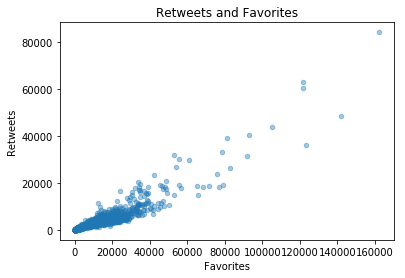

In [593]:
analyze_set.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.4)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and Favorites')
plt.savefig('a.png')

In [608]:
analyze_set['retweets'].corr(analyze_set['favorites'])

0.9275499339848764

The correlation between the favorites and retweets is 0.9275